# 1. Imports, Cleaning and EDA

## 1.1. Imports

In [1]:
from pySimFinLIB import pySimFin
import pandas as pd
import seaborn as sns
from simfin.names import *
import matplotlib.pyplot as plt
import requests
from dotenv import load_dotenv
import os
import pandas as pd

## 1.2 Data Cleaning

In [2]:
ticker = 'AAPL'
startDate = '2022-01-01'
endDate = '2023-01-01'

In [3]:
psf = pySimFin()

In [4]:
infoDF = psf.getCompanyInfo(ticker)
companyDF = psf.getCompanyList()
pricesDF = psf.getStockPrices(ticker,startDate,endDate)

In [5]:
companyDF

,id,name,ticker,sectorCode,industryName,sectorName,isin
0,1234791,STERLING BANCORP,STL,104002.0,Financial Services,Banks,US85917A1007
3,1253409,Infosys Ltd,INFY,101003.0,Technology,Application Software,US4567881085
4,1291790,ACCELERON PHARMA INC,XLRN,106001.0,Healthcare,Medical Diagnostics & Research,US00434H1086
42,65359,ALEXION PHARMACEUTICALS INC,ALXN,106002.0,Healthcare,Biotechnology,US0153511094
48,76840,"REMEDENT, INC.",REMI,106003.0,Healthcare,Medical Instruments & Equipment,US75954T1043
...,...,...,...,...,...,...,...
6264,18599360,Seanergy Maritime Holdings Corp.,SHIP,100010.0,Industrials,Transportation & Logistics,MHY737601945
6265,18599362,Wix.com Ltd.,WIX,101003.0,Technology,Application Software,IL0011301780
6266,18599364,Sprott Physical Platinum and Palladium Trust,SPPP,104001.0,Financial Services,Asset Management,CA85207Q1046
6267,18599366,Sportradar Group AG,SRAD,101003.0,Technology,Application Software,CH1134239669


In [6]:
stock_data = psf.getStockPrices(ticker, startDate, endDate)
stock_data 

,Common Shares Outstanding,Last Closing Price,Adjusted Closing Price,Highest Price,Lowest Price,Opening Price,Trading Volume
Date,,,,,,,
2022-01-03,16687631000,182.01,178.89,182.88,177.71,177.83,104701220
2022-01-04,16687631000,179.70,176.61,182.94,179.12,182.63,99310438
2022-01-05,16687631000,174.92,171.92,180.17,174.64,179.61,94537602
2022-01-06,16687631000,172.00,169.05,175.30,171.64,172.70,96903955
2022-01-07,16687631000,172.17,169.21,174.14,171.03,172.89,86709147
...,...,...,...,...,...,...,...
2022-12-23,16030382000,131.86,130.35,132.41,129.64,130.92,63814893
2022-12-27,16030382000,130.03,128.54,131.41,128.72,131.38,69007830
2022-12-28,16030382000,126.04,124.60,131.03,125.87,129.67,85438391


In [7]:
def selectMultipleStocks(selected_stocks, startDate, endDate):
    selected_stock_data = {}

    for ticker in selected_stocks:
        # Get stock data for each ticker
        stock_data = psf.getStockPrices(ticker, startDate, endDate)
        stock_data = stock_data['Last Closing Price']
        
        
        # Store stock data in the dictionary with the ticker as the key
        selected_stock_data[ticker] = stock_data

    return pd.DataFrame(selected_stock_data)

In [9]:


selected_stocks = ['AAPL','AMZN','NFLX','GOOG']

psf.selectMultipleStocks(selected_stocks, startDate, endDate)

,AAPL,AMZN,NFLX,GOOG
Date,,,,
2022-01-03,182.01,170.40,597.37,145.07
2022-01-04,179.70,167.52,591.15,144.42
2022-01-05,174.92,164.36,567.52,137.65
2022-01-06,172.00,163.25,553.29,137.55
2022-01-07,172.17,162.55,541.06,137.00
...,...,...,...,...
2022-12-23,131.86,85.25,294.96,89.81
2022-12-27,130.03,83.04,284.17,87.93
2022-12-28,126.04,81.82,276.88,86.46


In [10]:
def tickerFind(nameList,companyDF):
    tickerList = []
    for name in nameList:
        for index, company in companyDF.iterrows():
            if name == company['name']:
                tickerList.append(company['ticker'])
    return tickerList

names = list(companyDF['name'].sample(5))

tickerFind(names,companyDF)

['WKHS', 'PWP', 'CWGL', 'STC', 'AVID']

In [26]:
df = pricesDF.copy()
df.head()

,Common Shares Outstanding,Last Closing Price,Adjusted Closing Price,Highest Price,Lowest Price,Opening Price,Trading Volume
Date,,,,,,,
2022-01-03,16687631000,182.01,178.89,182.88,177.71,177.83,104701220
2022-01-04,16687631000,179.70,176.61,182.94,179.12,182.63,99310438
2022-01-05,16687631000,174.92,171.92,180.17,174.64,179.61,94537602
2022-01-06,16687631000,172.00,169.05,175.30,171.64,172.70,96903955
2022-01-07,16687631000,172.17,169.21,174.14,171.03,172.89,86709147


In [28]:
df = df.reset_index()



In [29]:
df.head()

,Date,Common Shares Outstanding,Last Closing Price,Adjusted Closing Price,Highest Price,Lowest Price,Opening Price,Trading Volume
0,2022-01-03,16687631000,182.01,178.89,182.88,177.71,177.83,104701220
1,2022-01-04,16687631000,179.70,176.61,182.94,179.12,182.63,99310438
2,2022-01-05,16687631000,174.92,171.92,180.17,174.64,179.61,94537602
3,2022-01-06,16687631000,172.00,169.05,175.30,171.64,172.70,96903955
4,2022-01-07,16687631000,172.17,169.21,174.14,171.03,172.89,86709147


In [30]:
# Rename for clarity (optional)
df.rename(columns={
    'Last Closing Price': 'Close',
    'Opening Price': 'Open',
    'Highest Price': 'High',
    'Lowest Price': 'Low',
    'Trading Volume': 'Volume'
}, inplace=True)

# Create next day's closing price as target
df['Next_Close'] = df['Close'].shift(-1)

# Drop rows with missing values (last row will be NaN after shift)
df = df.dropna()

# Convert Date column to datetime (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Define features and target
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Next_Close']


In [31]:
from sklearn.model_selection import train_test_split

# Use 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # Keep time order
)


In [32]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 2.8261
Mean Squared Error (MSE): 13.6085
R² Score: 0.7457


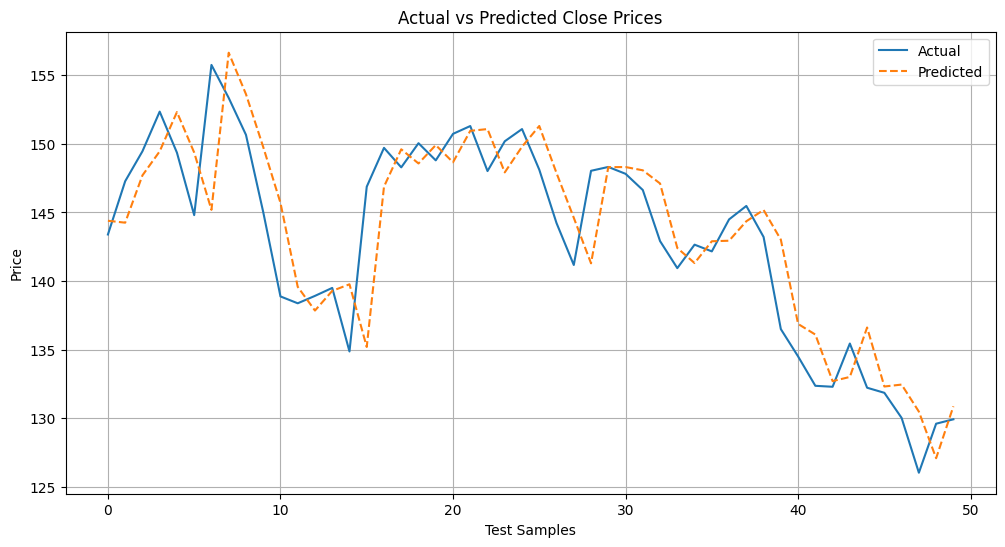

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Test Samples')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit models
lr_model.fit(X_train, y_train) 
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    'Linear Regression': lr_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'R²': r2
    }

# Display results
import pandas as pd

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='MAE')  # Lower MAE is better
results_df


,MAE,MSE,R²
Linear Regression,2.826121,13.608533,0.745702
Random Forest,3.752782,19.852331,0.629026
XGBoost,4.326179,25.850331,0.516943


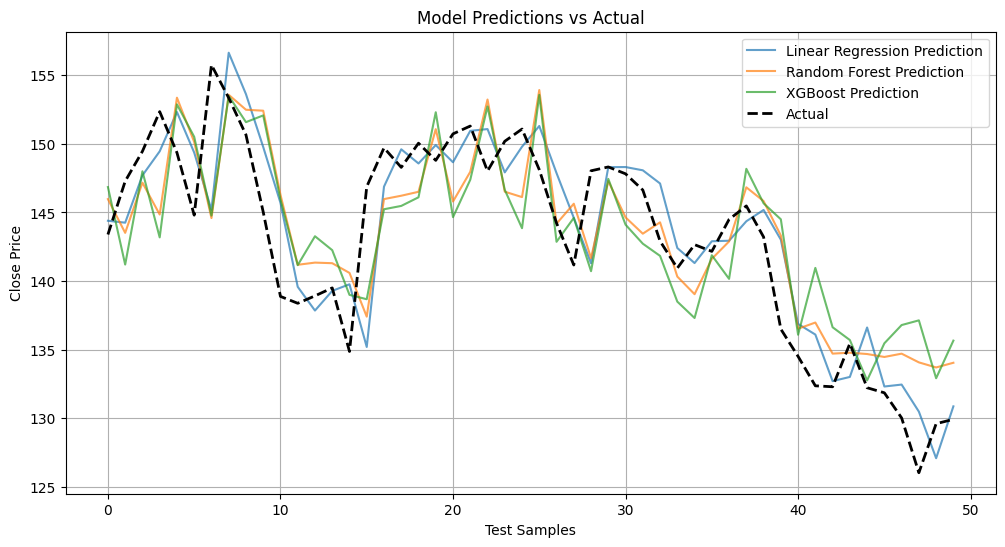

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.plot(y_pred, label=f'{name} Prediction', alpha=0.7)

plt.plot(y_test.values, label='Actual', linewidth=2, linestyle='--', color='black')
plt.title('Model Predictions vs Actual')
plt.xlabel('Test Samples')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
